<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Task_6/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

**Loading Data**

In [3]:
# load dataset
df_diabetes = pd.read_csv("/content/diabetes.csv")
print(df_diabetes)
print(df_diabetes.columns)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [4]:
#split dataset in features and target variable
df_features = df_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_target = df_diabetes[['Outcome']]

**Splitting Data**

In [5]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2,random_state = 101)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [6]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
classifier.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

**Evaluating Model**

In [7]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics

score = metrics.accuracy_score(y_pred,y_test)
print(score)

0.6883116883116883


In [8]:
from sklearn import metrics

classification_report = metrics.classification_report(y_pred,y_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        95
           1       0.61      0.53      0.56        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.68      0.69      0.68       154



**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [9]:
!pip install graphviz
!pip install six
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


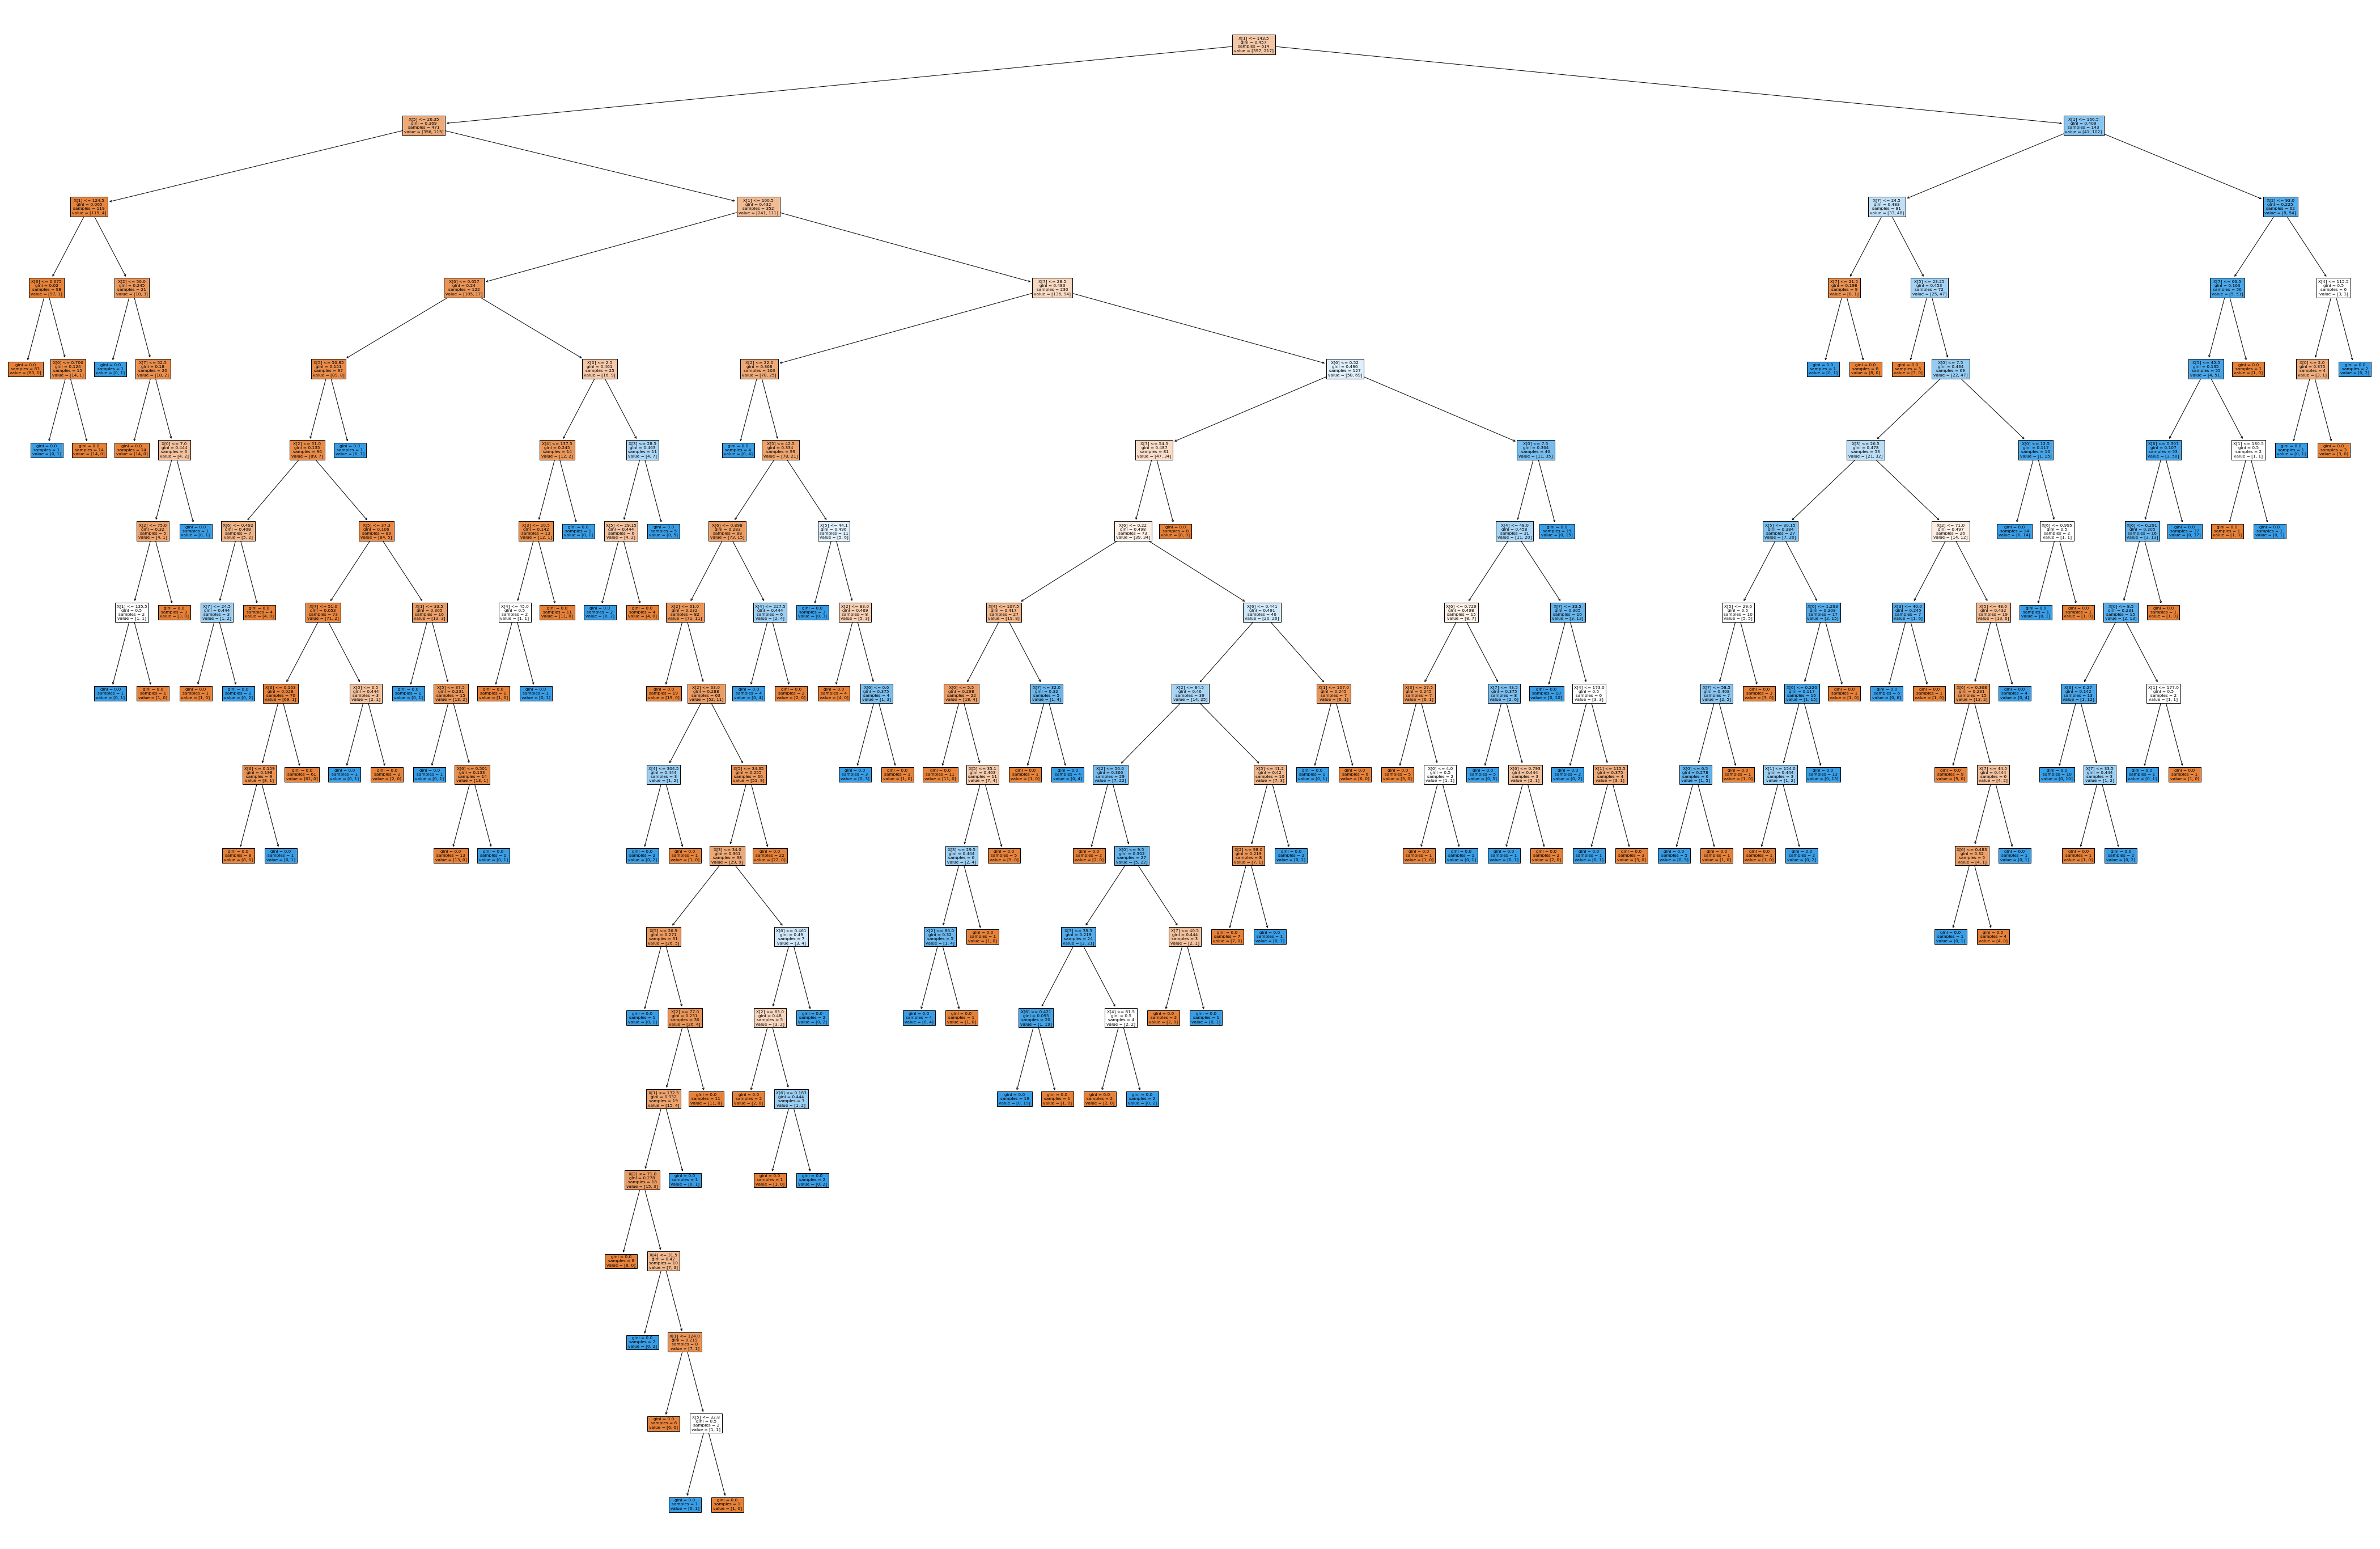

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus

plt.figure(figsize=(75,50))
tree.plot_tree(classifier,filled = True)
plt.show()

Gini is 0 for all leaf nodes, indicating pruning has not yet been done

**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [11]:
# Post-pruning
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=6,min_samples_split=50,min_samples_leaf=10) #didnt understand the rest of the parameters

#parameters: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Train Decision Tree Classifer
classifier.fit(x_train,y_train)

#Predict the response for test dataset
y_predpostpr = classifier.predict(x_test)
print(y_pred)

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
score = metrics.accuracy_score(y_predpostpr,y_test)
print()
print('score = ',score)

classification_report = metrics.classification_report(y_predpostpr,y_test)
print()
print('classification_report')
print()
print(classification_report)

[1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1
 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 1 1 0 1 0 0]

score =  0.7597402597402597

classification_report

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       114
           1       0.53      0.68      0.59        40

    accuracy                           0.76       154
   macro avg       0.70      0.73      0.71       154
weighted avg       0.78      0.76      0.77       154



**Visualizing Decision Trees** #post pruning

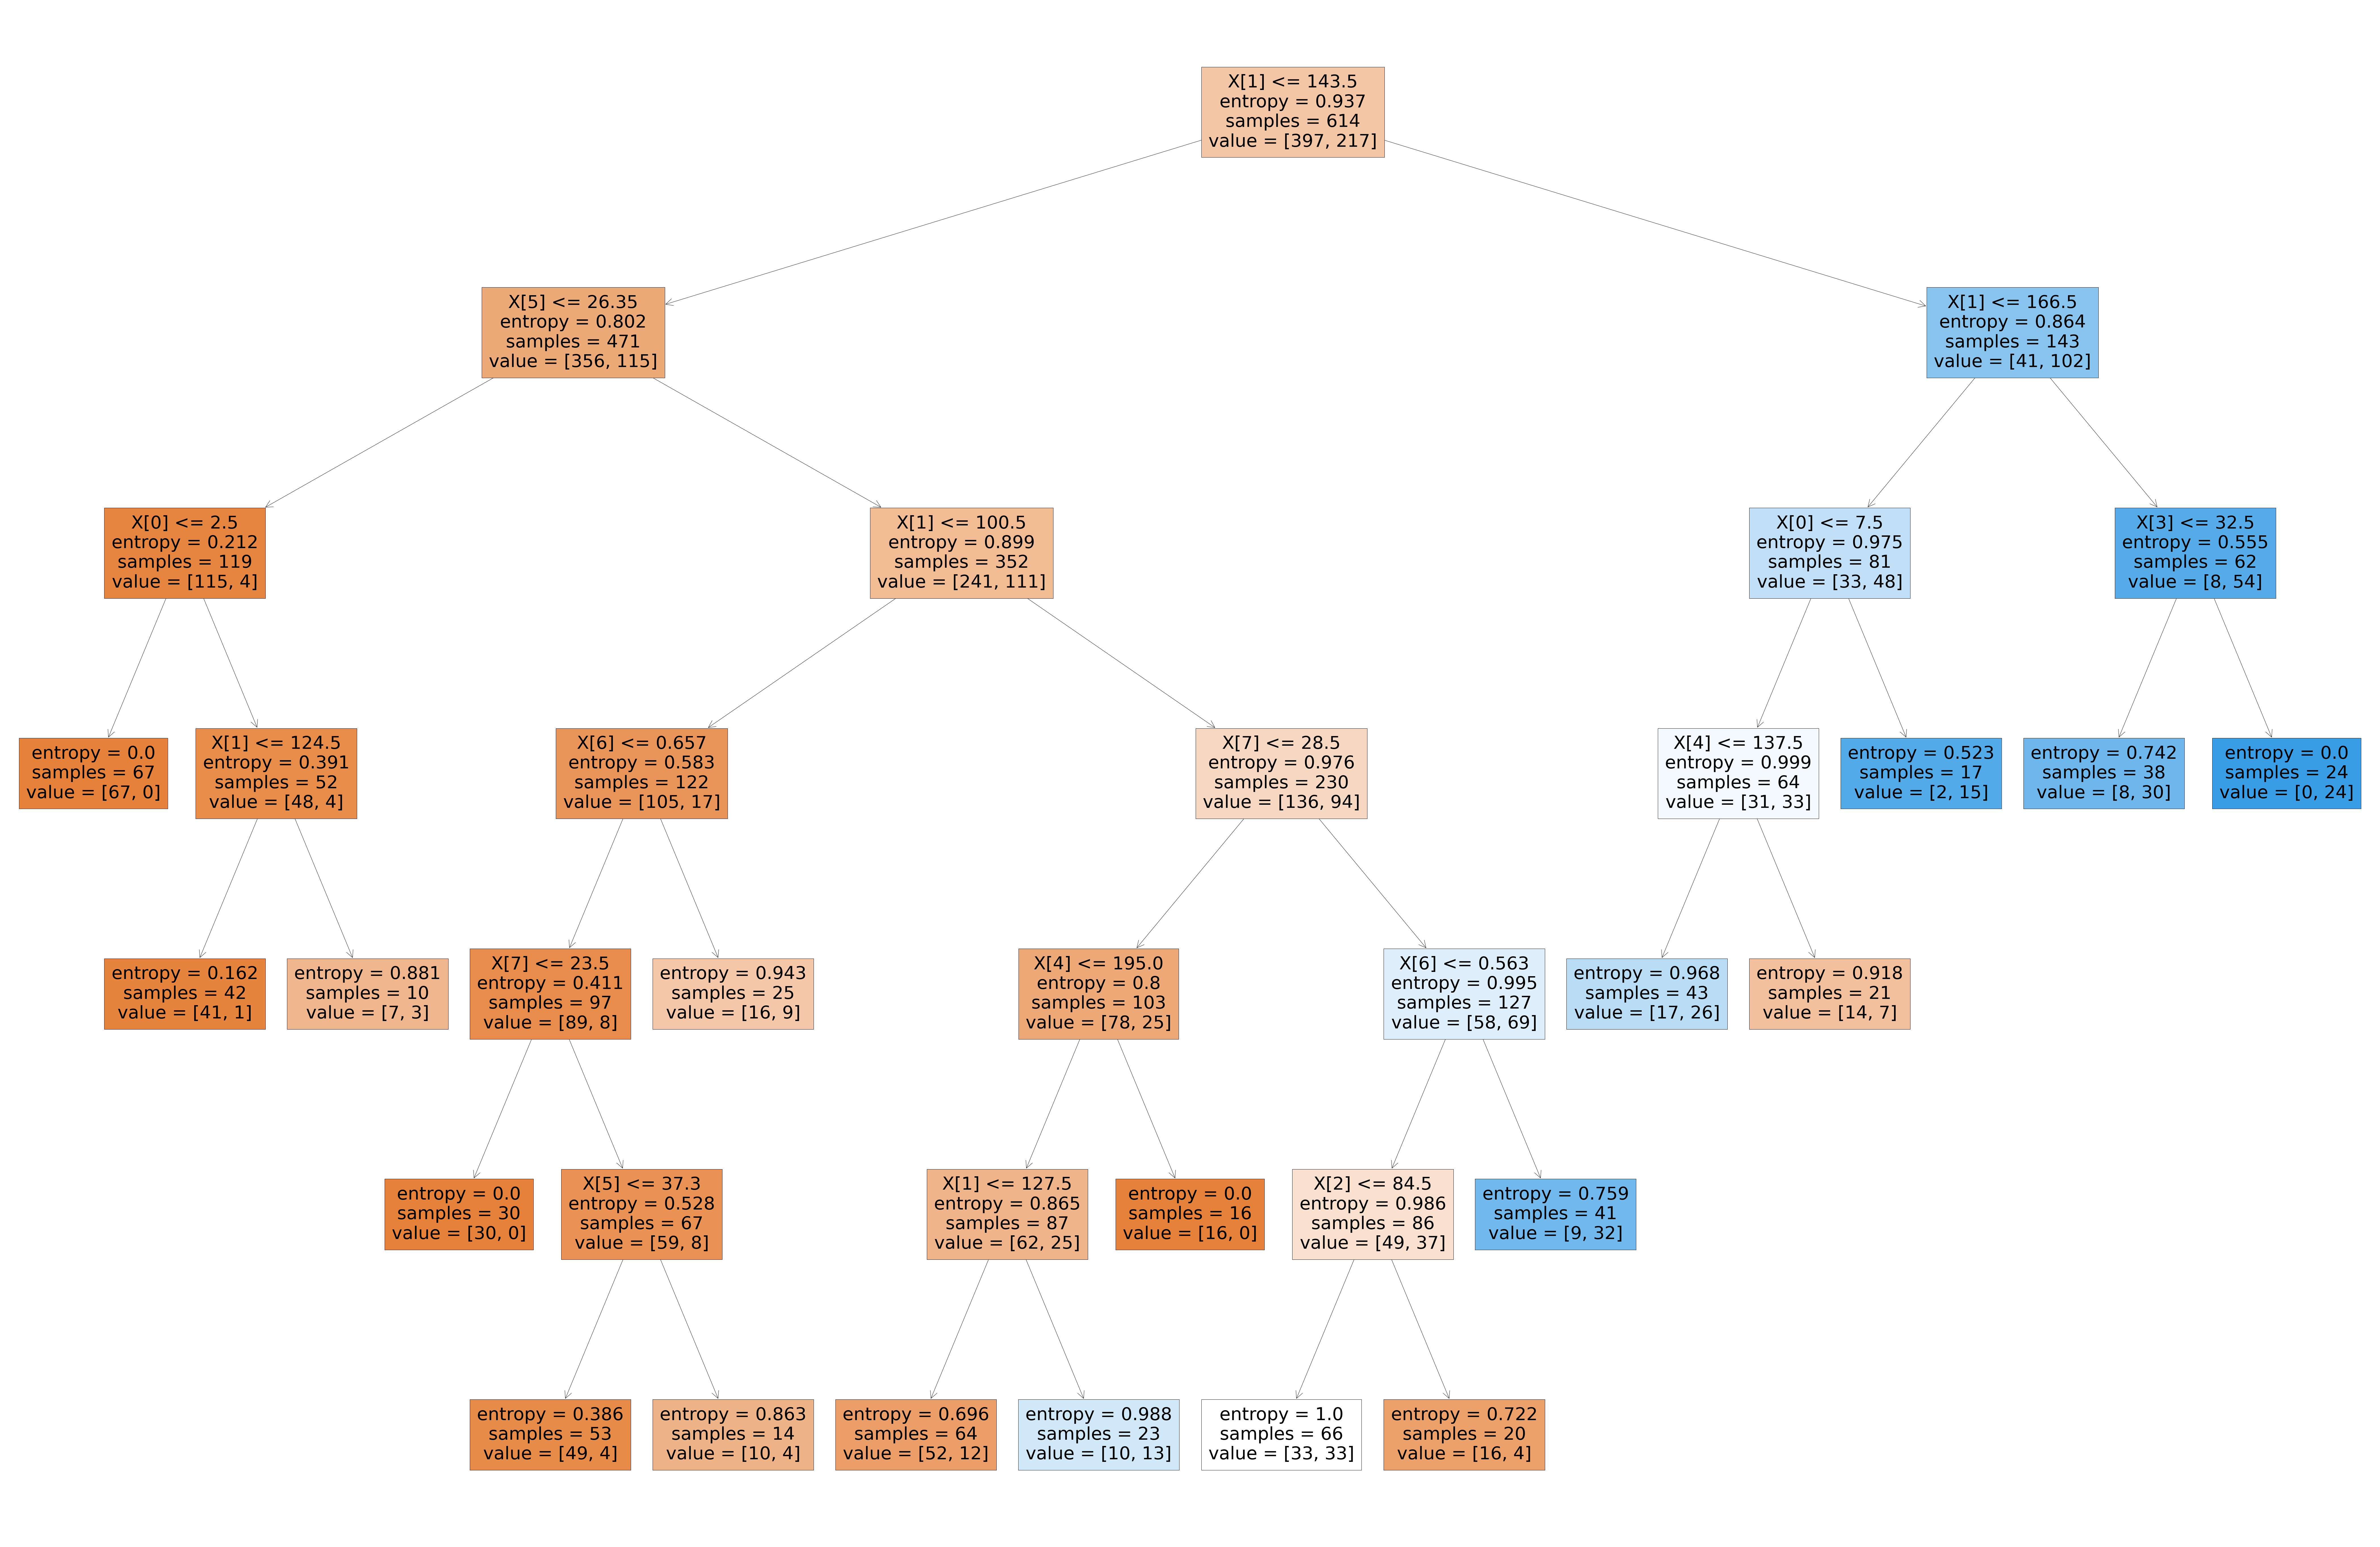

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus

plt.figure(figsize=(150,100))
tree.plot_tree(classifier,filled = True)
plt.show()

check out node x[2]<=84.5 in level 5, entropy is 0.986 then splitting causes an increase in entropy on in the left child...
isnt that not ideal? split shouldnt be occuring there right?

overall accuracy did improve tho...


In [12]:
# Pre-pruning

from sklearn.model_selection import GridSearchCV

grid_param={"criterion":["gini","entropy"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }

treemodel=DecisionTreeClassifier()
treemodel_grid_search=GridSearchCV(treemodel,param_grid=grid_param,cv=5,scoring='accuracy')

treemodel_grid_search.fit(x_train,y_train)

ypred_gridCV = treemodel_grid_search.predict(x_test)



In [13]:
from sklearn import metrics
score = metrics.accuracy_score(ypred_gridCV ,y_test)
print()
print('score = ',score)

classification_report = metrics.classification_report(ypred_gridCV ,y_test)
print()
print('classification_report')
print()
print(classification_report)


score =  0.7337662337662337

classification_report

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        96
           1       0.67      0.59      0.62        58

    accuracy                           0.73       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



**Implement Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create RandomForest Tree classifer object

# Train RandomForest Tree Classifer

#Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?

If the model overfitting try out different way to fix it!!

### All the best!!! I hope you will Enjoy the Task!